# Import libraries

In [23]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset

In [24]:


data = pd.read_csv('UNRATE.csv', parse_dates=['observation_date'], index_col='observation_date')
ts = data['UNRATE']

# Plot the time series

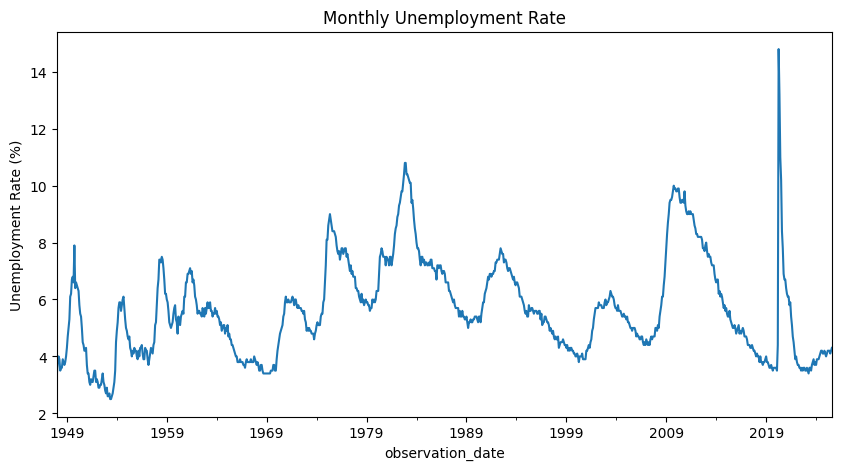

In [25]:



plt.figure(figsize=(10,5))
ts.plot(title='Monthly Unemployment Rate')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Test for stationarity using ADF

In [26]:


adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
if adf_result[1] > 0.05:
    print("Series is likely NON-stationary.")
else:
    print("Series is likely stationary.")

ADF Statistic: -3.93388224756598
p-value: 0.0017991696475871267
Series is likely stationary.



# Make series stationary by first differencing

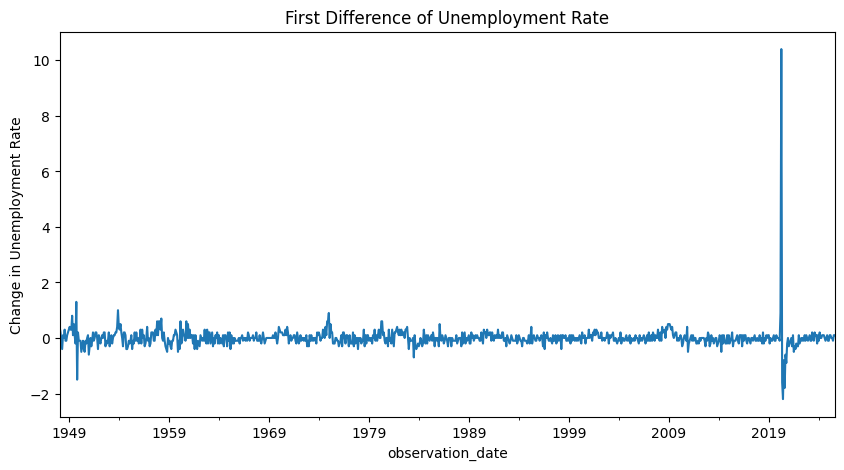

In [27]:

ts_diff = ts.diff().dropna()

plt.figure(figsize=(10,5))
ts_diff.plot(title='First Difference of Unemployment Rate')
plt.ylabel('Change in Unemployment Rate')
plt.show()

# Plot ACF and PACF for the differenced series

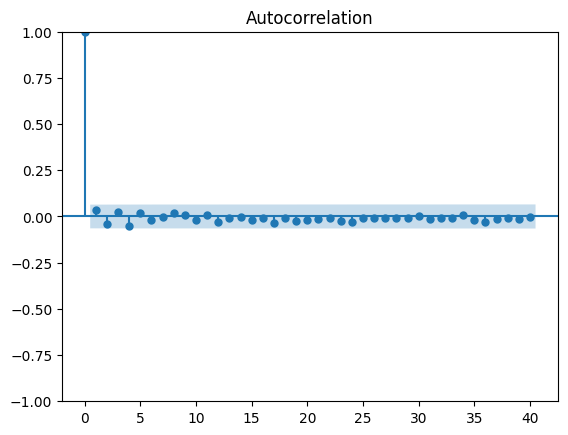

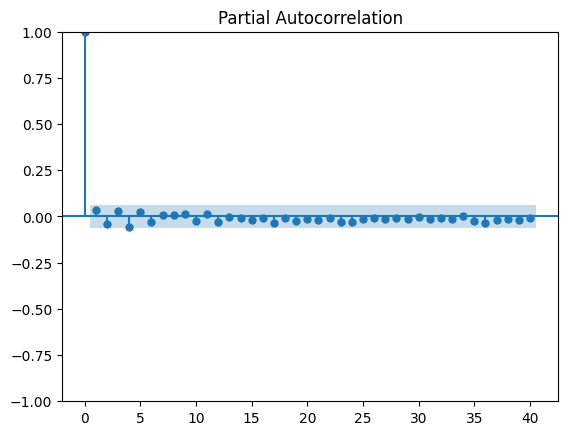

In [28]:

plot_acf(ts_diff, lags=40)
plot_pacf(ts_diff, lags=40)
plt.show()



In [29]:

import statsmodels.api as sm


data['UNRATE_lag1'] = ts.shift(1)
data = data.dropna()


X = data['UNRATE_lag1']
y = data['UNRATE']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.503e+04
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:59:33   Log-Likelihood:                -494.58
No. Observations:                 931   AIC:                             993.2
Df Residuals:                     929   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1719      0.047      3.668      

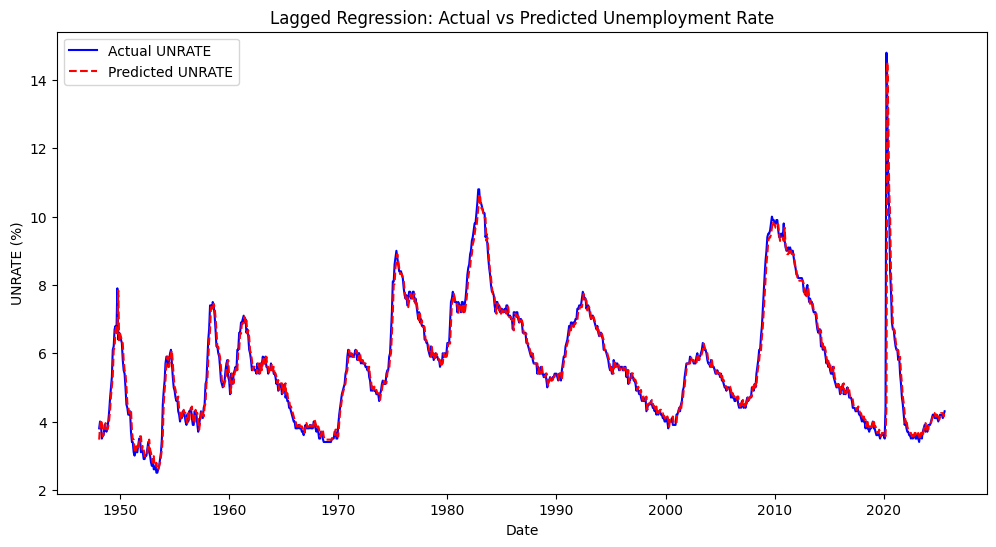

In [30]:
data['Predicted'] = model.predict(X)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['UNRATE'], label='Actual UNRATE', color='blue')
plt.plot(data.index, data['Predicted'], label='Predicted UNRATE', color='red', linestyle='--')
plt.title('Lagged Regression: Actual vs Predicted Unemployment Rate')
plt.ylabel('UNRATE (%)')
plt.xlabel('Date')
plt.legend()
plt.show()



In [31]:
import statsmodels.api as sm

# Create lagged variable
data['UNRATE_lag1'] = data['UNRATE'].shift(1)
data_gls = data.dropna()

X = sm.add_constant(data_gls['UNRATE_lag1'])
y = data_gls['UNRATE']

# Fit GLS with AR(1) covariance structure
gls_model = sm.GLSAR(y, X, rho=1)  # rho=1: start with AR(1)
gls_results = gls_model.iterative_fit(maxiter=10)  # iteratively estimate rho
print(gls_results.summary())


                           GLSAR Regression Results                           
Dep. Variable:                 UNRATE   R-squared:                       0.935
Model:                          GLSAR   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.341e+04
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        09:59:33   Log-Likelihood:                -492.91
No. Observations:                 929   AIC:                             989.8
Df Residuals:                     927   BIC:                             999.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1878      0.049      3.794      